In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
reviews = pd.read_csv('./data/wine-reviews/winemag-data_first150k.csv', index_col=0)

In [3]:
reviews.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

# 散点图 (Scatter plot)

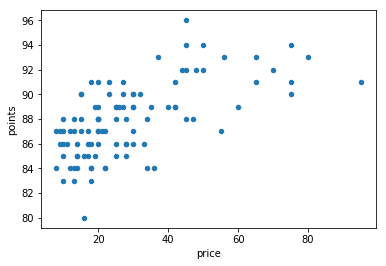

In [4]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

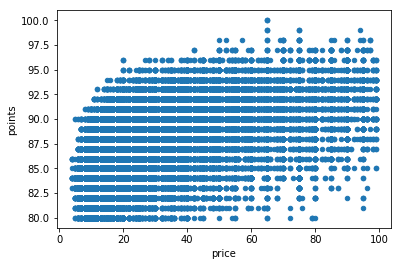

In [5]:
# 全部点
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

# Hexplot 六边形图？？  主要是能看出聚类的效果吧

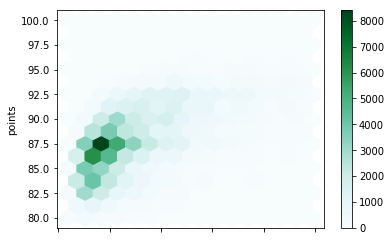

In [6]:
# gridsize：六边形的个数
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

**总结：像散点图和六边形图，适用于有序类别数据和连续区间数据混合的情况，比如说年龄(ordinal categorical data)和身高(interval data)**

注意，如果数据量过多，散点图太稠密，看不出规律的话，有两种解决办法：

- 1、使用sample，减少样本数量
- 2、画Hexplot

# Stacked plots

In [7]:
wine_counts = pd.read_csv('./data/most-common-wine-scores/top-five-wine-score-counts.csv', index_col=0)

In [8]:
wine_counts.head()

Bordeaux-style Red Blend  Cabernet Sauvignon  Chardonnay  Pinot Noir  \
points                                                                         
80                           5.0                87.0        68.0        36.0   
81                          18.0               159.0       150.0        83.0   
82                          72.0               435.0       517.0       295.0   
83                          95.0               570.0       669.0       346.0   
84                         268.0               923.0      1146.0       733.0   

        Red Blend  
points             
80           72.0  
81          107.0  
82          223.0  
83          364.0  
84          602.0

In [9]:
wine_counts.describe()

Bordeaux-style Red Blend  Cabernet Sauvignon   Chardonnay   Pinot Noir  \
count                 20.000000           21.000000    20.000000    21.000000   
mean                 227.250000          603.380952   688.750000   648.952381   
std                  194.822693          498.897332   579.497866   579.891755   
min                    1.000000            3.000000     3.000000     2.000000   
25%                   35.250000          101.000000   130.750000    83.000000   
50%                  214.500000          570.000000   643.000000   586.000000   
75%                  396.750000         1008.000000  1170.500000  1125.000000   
max                  557.000000         1566.000000  1809.000000  1726.000000   

         Red Blend  
count    21.000000  
mean    446.571429  
std     430.469461  
min       2.000000  
25%      72.000000  
50%     364.000000  
75%     820.000000  
max    1260.000000

注意，points是index列，不是columns

**对stacked bar的解读**

它相当于把多个条形图整合到了一起，对比多个类别的某个指标特别管用，很直观，信息量很大。如下图，就可以看出5种酒在每个不同的档次上的得分数量对比，也可以看出同一种酒在各个档次的数量分布。看的时候，对比每个bar中各个颜色长度所占比例，即可看出数量大小。

**缺点**

- 1、类别数目较少的数据集，比如本例的酒名只有5种，太多了会很乱，失去直观性。
- 2、如果两种类别数据相近，从图上无法明显看出哪种数据更好，因为没有具体的数值展示

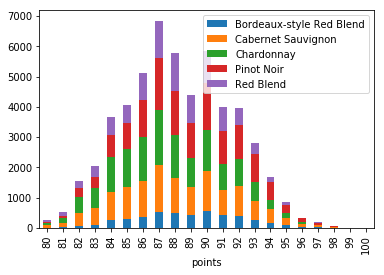

In [10]:
wine_counts.plot.bar(stacked=True)

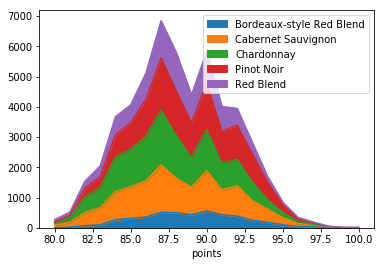

In [11]:
wine_counts.plot.area()

# 多折线图 (Bivariate line chart)

**这个图可以弥补上述stacked plot的第二个缺点，可以精确对比每个指标了**

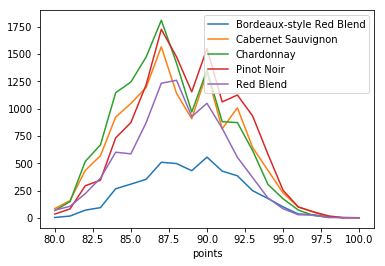

In [12]:
wine_counts.plot.line()

# 练习

In [13]:
pokemon = pd.read_csv('./data/pokemon/Pokemon2.csv', index_col=0)

In [14]:
pokemon.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [15]:
pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

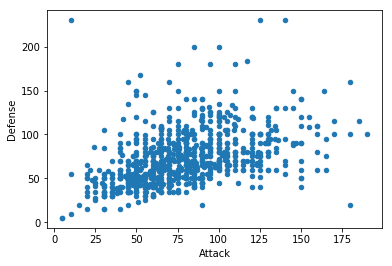

In [16]:
pokemon.plot.scatter(x='Attack', y='Defense')

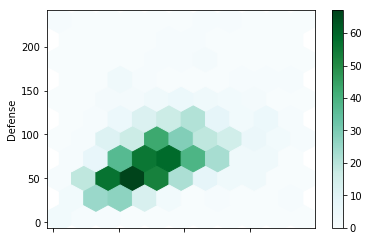

In [17]:
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=10)

In [18]:
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]

In [19]:
pokemon_stats_legendary

Attack     Defense
Legendary Generation                        
False     1            74.981250   70.175000
          2            70.693069   72.118812
          3            76.971831   69.901408
          4            79.620370   75.074074
          5            78.246667   70.486667
          6            70.459459   74.013514
True      1           120.833333   89.166667
          2            99.000000   99.000000
          3           118.333333  107.222222
          4           109.846154  103.538462
          5           120.266667   90.733333
          6           125.250000  101.375000

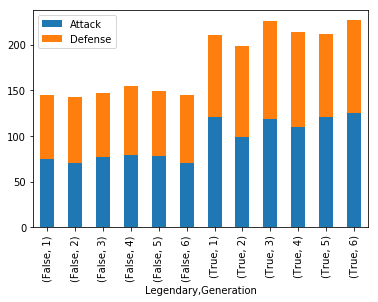

In [20]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [21]:
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [22]:
pokemon_stats_by_generation

HP     Attack    Defense    Sp. Atk    Sp. Def      Speed
Generation                                                                  
1           65.819277  76.638554  70.861446  71.819277  69.090361  72.584337
2           71.207547  72.028302  73.386792  65.943396  73.905660  61.811321
3           66.543750  81.625000  74.100000  75.806250  71.225000  66.925000
4           73.082645  82.867769  78.132231  76.404959  77.190083  71.338843
5           71.787879  82.066667  72.327273  71.987879  68.739394  68.078788
6           68.268293  75.804878  76.682927  74.292683  74.890244  66.439024

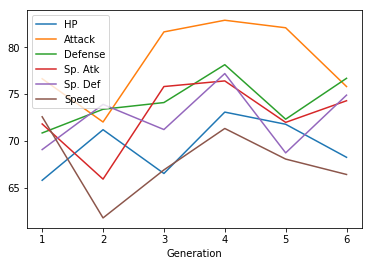

In [23]:
pokemon_stats_by_generation.plot.line()